In [27]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import matplotlib.pyplot as plt
import mglearn
import graphviz
from sklearn.model_selection import train_test_split

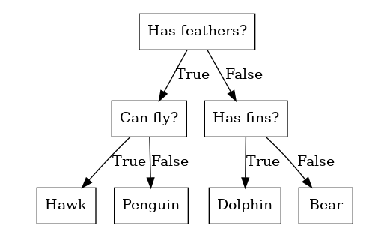

In [28]:
mglearn.plots.plot_animal_tree()

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))


Accuracy on training set:1.000
Accuracy on test set:0.937


In [30]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0).fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.951


In [31]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

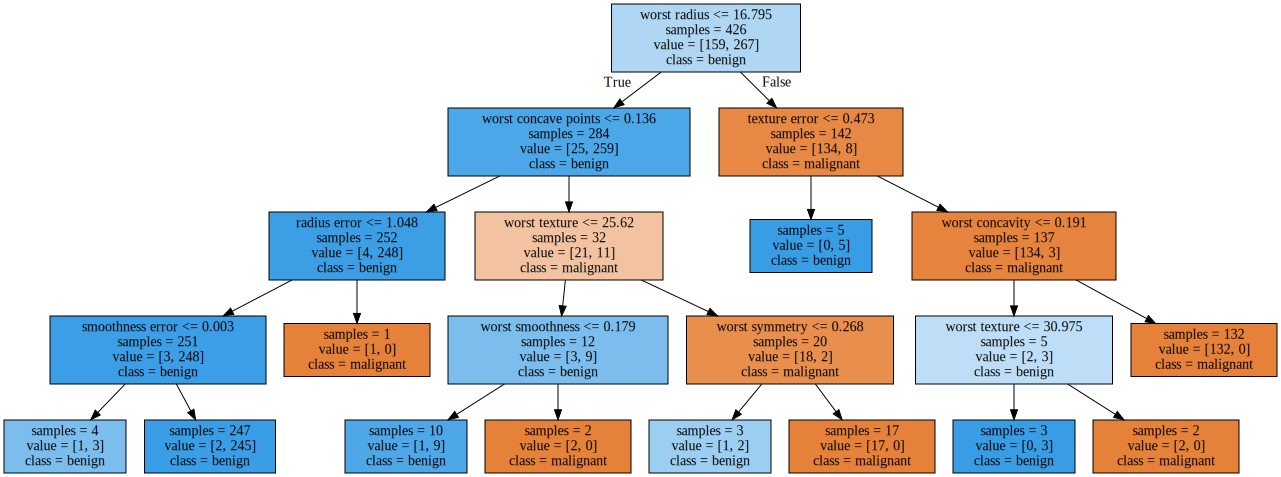

In [32]:
with open("tree.dot")as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [33]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


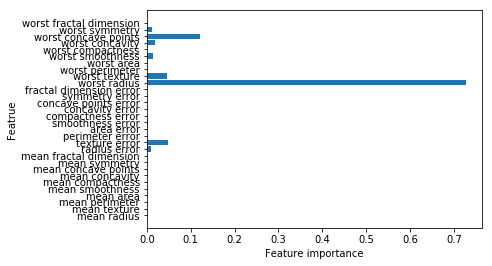

In [34]:
def plot_feature_importances_cancer(model):
    n_featrues=cancer.data.shape[1]
    plt.barh(range(n_featrues),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_featrues),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Featrue")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


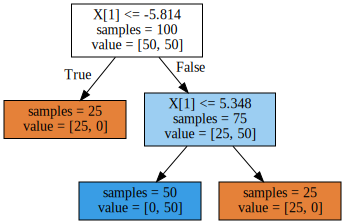

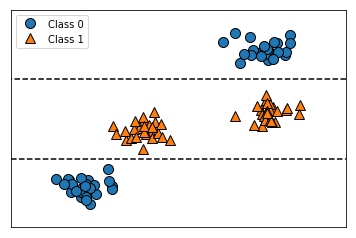

In [35]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0,0.5,'Price in $/Mbyte')

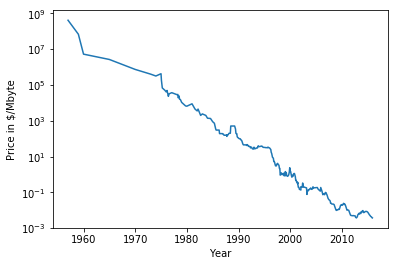

In [36]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

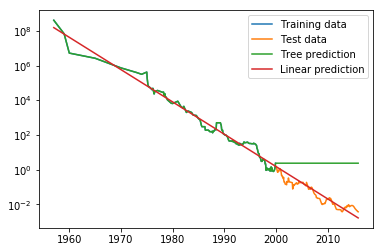

In [38]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [39]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

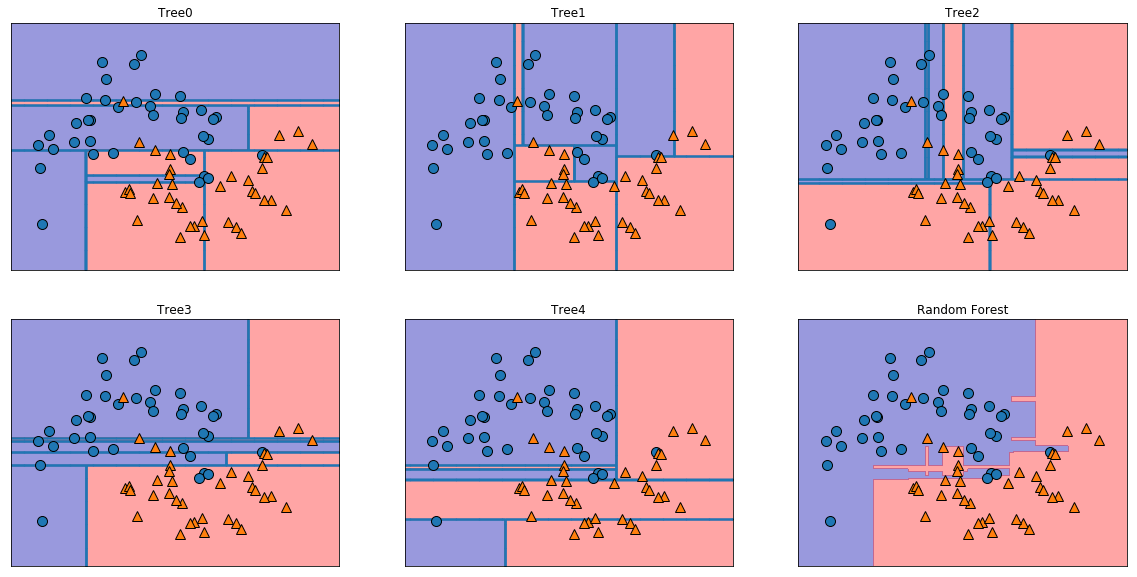

In [40]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


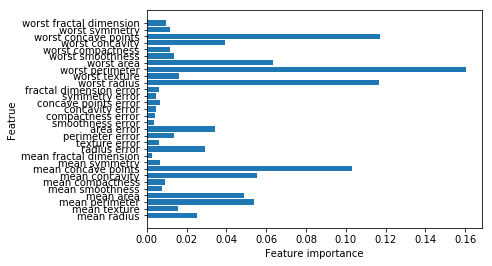

In [42]:
plot_feature_importances_cancer(forest)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.958


In [44]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.972


In [45]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.8)
gbrt.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.993


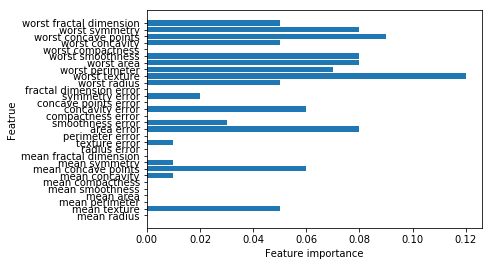

In [48]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)